# Bringing “Suspense and Surprise” to (Actual Belief) Data

### Reasearch by: Judd B. Kessler, Andrew McClellan, Andrew Schotter

#### Program Author: Anwar A. Ruff

In [2]:
import sys
import pandas as pd
import numpy as np
from pandas import DataFrame, Series, ExcelFile, ExcelWriter
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Figure 1. Subject Beliefs at Each Elicitation (Castle TV Drama)

### Figure 1. Data

In [3]:
f1df = pd.read_csv('data/figure_1.csv').drop("Subject Number", axis=1)
f1df.index = range(1, len(f1df) + 1)
f1df = f1df.transpose()
f1df.index = range(1, len(f1df) + 1)
f1df

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,59.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,95.0,...,50.0,50.0,65.0,50.0,52.5,50.0,90.0,50.0,90.0,50.0
2,68.0,60.0,50.0,60.0,51.5,67.5,50.0,50.0,75.0,90.0,...,55.0,61.0,50.5,75.0,55.0,60.0,60.0,57.5,60.0,85.0
3,77.5,70.0,60.0,75.0,51.5,72.5,65.0,60.0,80.0,92.5,...,60.0,68.0,55.0,95.0,75.0,60.0,67.5,62.5,67.5,90.0
4,82.5,70.0,65.0,75.0,52.5,77.5,85.0,55.0,80.0,97.5,...,57.5,69.5,82.5,95.0,65.0,80.0,90.0,75.0,80.0,95.0
5,87.5,75.0,65.0,75.0,53.0,80.0,75.0,55.0,80.0,97.5,...,55.0,71.5,72.5,95.0,65.0,85.0,97.5,75.0,82.5,95.0
6,92.5,85.0,65.0,85.0,52.0,85.0,75.0,55.0,75.0,93.5,...,52.5,79.0,97.5,95.0,60.0,75.0,92.5,75.0,80.0,90.0
7,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


## Figure 1: Subject Beliefs at Each Elicitation (Castle TV Drama)

### Figure 1. line plot (Light Background)

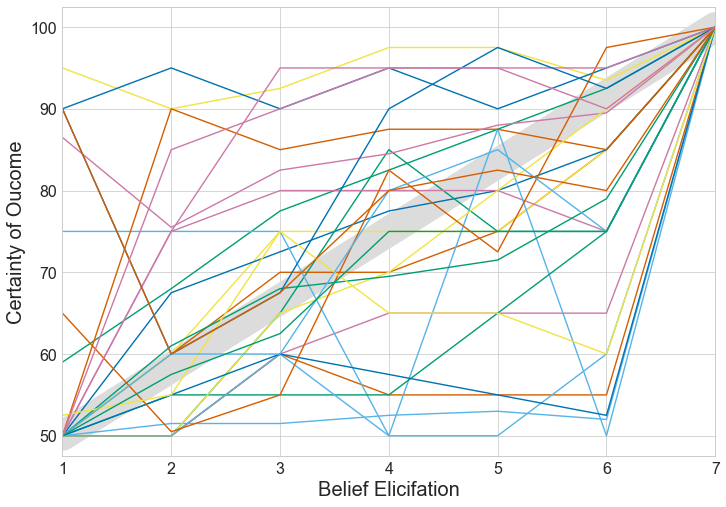

In [5]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
optimalBelief = np.arange(50, 101, 50/6)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='gainsboro')
for col in range(1, len(f1df.columns) + 1):
    plt.plot(f1df[col])

### Figure 1. Line Plot (Dark Background)

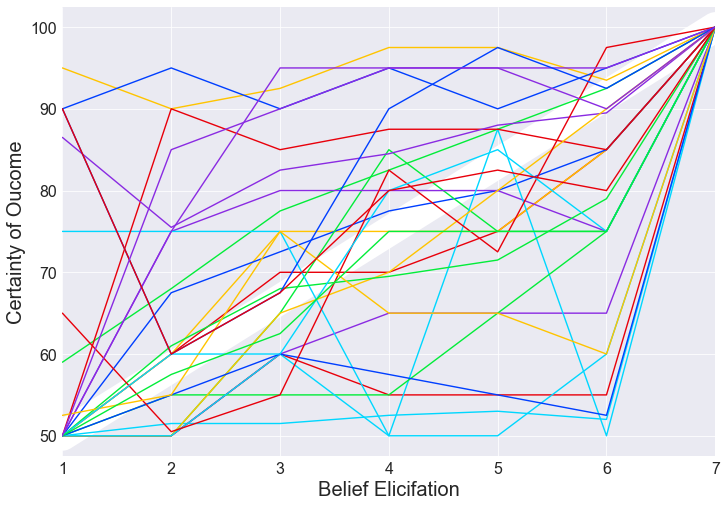

In [6]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="bright", style="darkgrid", font_scale=2)
optimalBelief = np.arange(50, 101, 50/6)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='w')
for col in range(1, len(f1df.columns) + 1):
    plt.plot(f1df[col])

## Figure 2. Subject Beliefs at Each Elicitation (Cowboys vs. Eagles Football Game):

### Figure 2. Data

In [7]:
f2df = pd.read_csv('data/figure_2.csv').drop("Subject Number", axis=1)
f2df.index = range(1, len(f2df) + 1)
f2df = f2df.transpose()
f2df.index = range(1, len(f2df) + 1)
f2df

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
1,75.0,100.0,75.0,60.0,56.0,50.0,50.0,70.0,50.0,50.0,...,70.0,60.0,69.0,50.0,50.0,50.0,75.0,85.0,NaN,NaN
2,80.0,100.0,75.0,60.0,55.0,53.0,50.0,65.0,67.0,50.0,...,73.0,65.0,68.0,50.0,50.0,75.0,65.0,85.0,NaN,NaN
3,75.0,100.0,75.0,63.0,70.0,53.0,60.0,75.0,60.0,50.0,...,70.0,60.0,69.0,50.0,62.0,50.0,75.0,90.0,NaN,NaN
4,80.0,100.0,75.0,55.0,87.0,53.0,80.0,80.0,60.0,50.0,...,70.0,67.0,73.0,50.0,65.0,65.0,76.0,85.0,NaN,NaN
5,86.0,100.0,75.0,51.0,90.0,50.0,83.0,84.0,55.0,50.0,...,55.0,60.0,63.0,59.0,56.0,65.0,80.0,90.0,NaN,NaN
6,80.0,100.0,75.0,50.0,94.0,60.0,86.0,85.0,55.0,50.0,...,52.0,73.0,66.0,70.0,50.0,60.0,88.0,90.0,NaN,NaN
7,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,50.0,...,99.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN


### Figure 2. Line Plot (Light Background)

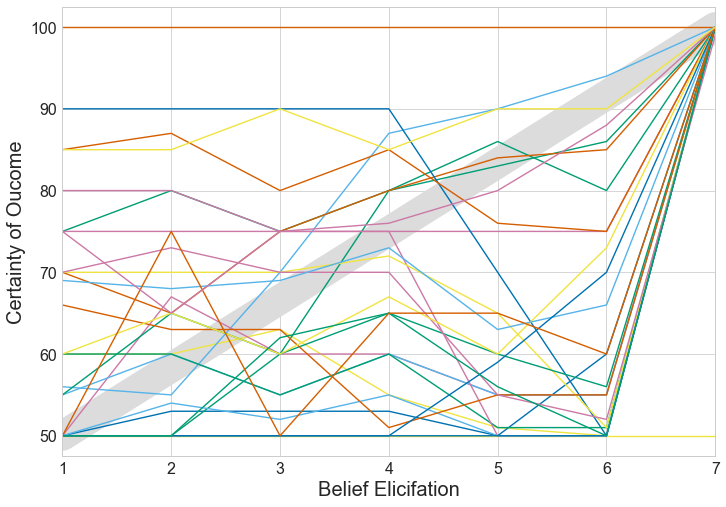

In [8]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='gainsboro')
for col in range(1, len(f2df.columns) + 1):
    plt.plot(f2df[col])

### Figure 2. Line Plot (Dark Background)

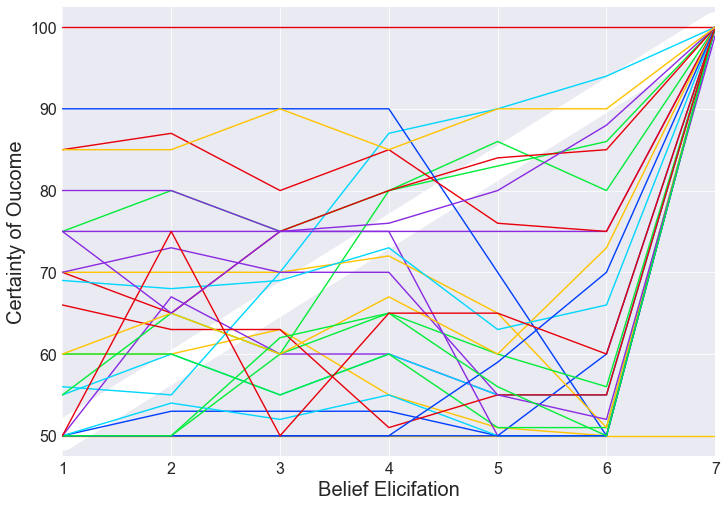

In [9]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="bright", style="darkgrid", font_scale=2)
optimalBelief = np.arange(50, 101, 50/6)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='w')
for col in range(1, len(f2df.columns) + 1):
    plt.plot(f2df[col])

## Figure 3: Subject Beliefs at Each Elicitation (Eagles vs. Saints Football Game)

### Figure 3. Data

In [17]:
f3df = pd.read_csv('data/figure_3.csv')
f3df.index = range(1, len(f3df) + 1)
f3df = f3df.transpose()
f3df.index = range(1, len(f3df) + 1)
f3df

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
1,100.0,50.0,50.0,58.0,70.0,55.0,50.0,69.0,70.0,75.0,...,70.0,95.0,70.0,90.0,75.0,80.0,60.0,97.0,56.0,NaN
2,100.0,51.0,50.0,61.0,75.0,51.0,50.0,50.0,50.0,75.0,...,50.0,97.0,60.0,90.0,71.0,70.0,50.0,98.0,57.0,NaN
3,100.0,60.0,60.0,61.0,70.0,50.0,50.0,65.0,55.0,70.0,...,75.0,96.0,60.0,90.0,75.0,80.0,60.0,98.0,59.0,NaN
4,100.0,60.0,55.0,61.0,65.0,50.0,50.0,57.0,60.0,75.0,...,60.0,97.0,60.0,89.0,70.0,70.0,55.0,98.0,50.0,NaN
5,100.0,60.0,75.0,71.0,50.0,50.0,65.0,79.0,70.0,55.0,...,95.0,85.0,60.0,95.0,85.0,80.0,75.0,98.0,55.0,NaN
6,100.0,51.0,70.0,65.0,55.0,50.0,60.0,57.0,50.0,55.0,...,75.0,85.0,55.0,94.0,75.0,55.0,70.0,98.0,56.0,NaN
7,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.0,100.0,NaN


### Figure 3. Line Plot (Light Background)

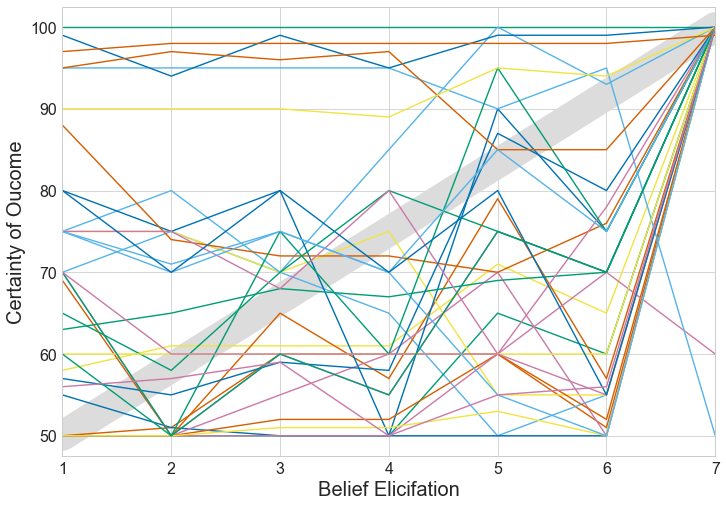

In [18]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='gainsboro')
for col in range(1, len(f3df.columns) + 1):
    plt.plot(f3df[col])

### Figure 3. Line Plot (Light Background)

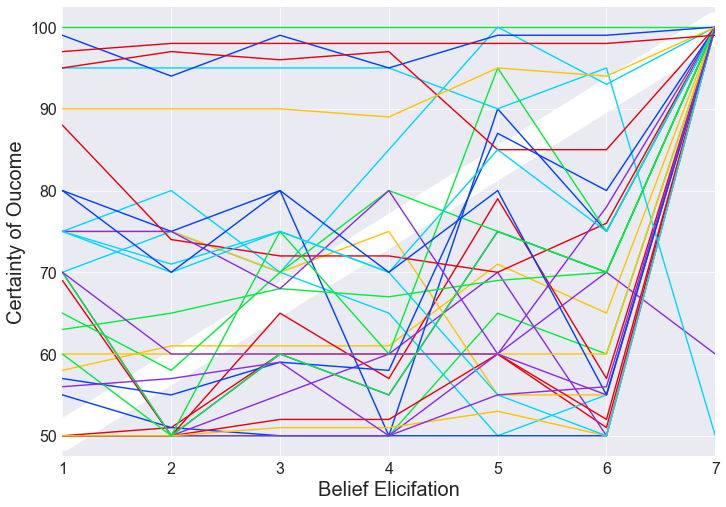

In [19]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="bright", style="darkgrid", font_scale=2)
optimalBelief = np.arange(50, 101, 50/6)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='w')
for col in range(1, len(f3df.columns) + 1):
    plt.plot(f3df[col])

## Figure 4: Cumulative Distribution of deviations from the Optimal Residual-Variance Path

### Figure 4. Data

In [16]:
f4df = pd.read_csv('data/figure_4.csv')
f4df

,Castle - Percent of Subjects,Castle - Percent of Maximum RV Band,Saints vs Eagles - Percent of Subjects,Saints vs Eagle - Percent of Maximum RV Band,Cowboys vs Eagles - Percent of Subjects,Cowboys vs Eagles - Percent of Maximum RV Band
0,0.0,0.0000,0.000000,0.0000,0.000000,0.0000
1,0.0,0.0002,0.058824,0.0002,0.033333,0.0002
2,0.0,0.0004,0.058824,0.0004,0.033333,0.0004
3,0.0,0.0006,0.058824,0.0006,0.033333,0.0006
4,0.0,0.0008,0.058824,0.0008,0.033333,0.0008
5,0.0,0.0010,0.058824,0.0010,0.033333,0.0010
6,0.0,0.0012,0.058824,0.0012,0.033333,0.0012
7,0.0,0.0014,0.058824,0.0014,0.033333,0.0014
8,0.0,0.0016,0.058824,0.0016,0.033333,0.0016
9,0.0,0.0018,0.058824,0.0018,0.033333,0.0018


### Figure 4. Line Plot (Light Background)

In [26]:
f4df.columns = ['cs', 'crv', 'ses','serv', 'ces', 'cerv']

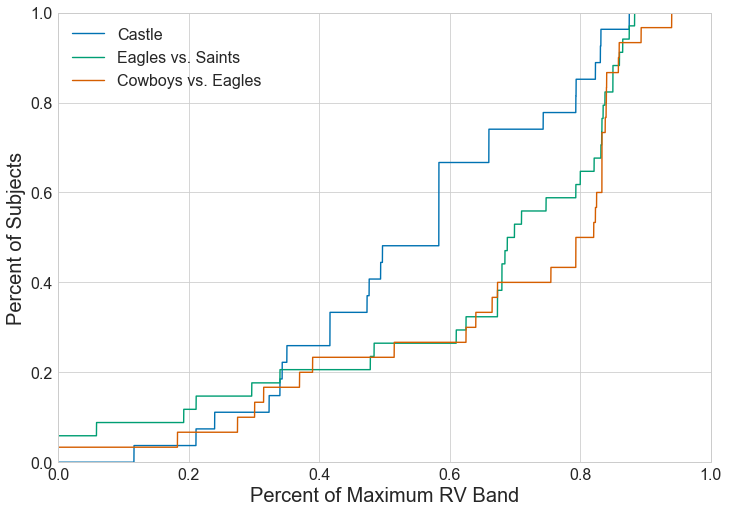

In [31]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(0, 1, 0.05)
plt.ylim(0, 1, 0.1)
plt.xlabel('Percent of Maximum RV Band', fontsize=20)
plt.ylabel('Percent of Subjects', fontsize=20)
l1, = plt.plot(f4df['crv'], f4df['cs'], label='Castle')
l2, = plt.plot(f4df['serv'], f4df['ses'], label='Eagles vs. Saints')
l3, = plt.plot(f4df['cerv'], f4df['ces'], label='Cowboys vs. Eagles')
plt.legend(handles=[l1, l2, l3])

### Figure 4. Line Plot (Dark Background)

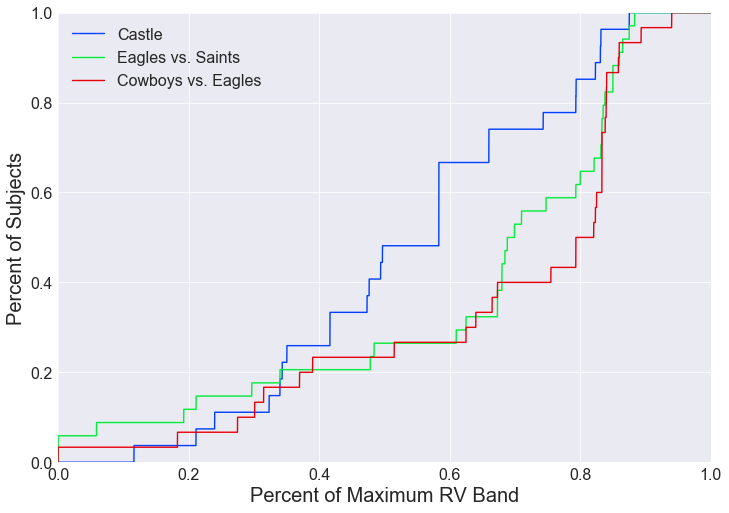

In [30]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="bright", style="darkgrid", font_scale=2)
plt.xlim(0, 1, 0.05)
plt.ylim(0, 1, 0.1)
plt.xlabel('Percent of Maximum RV Band', fontsize=20)
plt.ylabel('Percent of Subjects', fontsize=20)
l1, = plt.plot(f4df['crv'], f4df['cs'], label='Castle')
l2, = plt.plot(f4df['serv'], f4df['ses'], label='Eagles vs. Saints')
l3, = plt.plot(f4df['cerv'], f4df['ces'], label='Cowboys vs. Eagles')
plt.legend(handles=[l1, l2, l3])